In [188]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [189]:
img = cv2.imread('img.png', 0)

The image has gray scale values between 0 and 255.

In [190]:
img

array([[177, 177, 177, ..., 177, 177, 177],
       [177, 177, 177, ..., 177, 177, 177],
       [177, 177, 177, ..., 177, 177, 177],
       ...,
       [177, 177, 177, ..., 177, 177, 177],
       [177, 177, 177, ..., 177, 177, 177],
       [177, 177, 177, ..., 177, 177, 177]], dtype=uint8)

(180, 180)


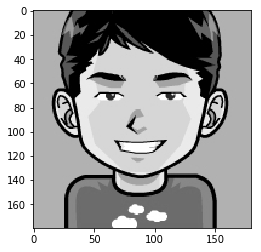

In [191]:
h,w = img.shape[:2]
print img.shape
plt.imshow(img,cmap='gray')
plt.show()

Use a rotation matrix to rotate the image.

$$
A = \begin{bmatrix}
        \cos\theta & -\sin\theta \\
        \sin\theta & \cos\theta
    \end{bmatrix}
$$

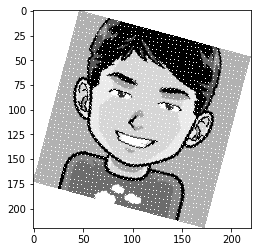

In [192]:
# Create vector data structure
# e.g.
# [
#    [30,180], [250] // [x,y], [gray scale value]
# ]
vs = []
for ri, r in enumerate(img):
    for ci, v in enumerate(r):
        vs.append([
            [ri, ci],
            [v]
        ])

# Rotate the image
for i, r in enumerate(vs):
    x = r[0][0]
    y = r[0][1]
    
    # Ratate the image 15 degrees
    rad = 15
    A = [[math.cos(math.radians(rad)), math.sin(math.radians(rad))],
         [-math.sin(math.radians(rad)) , math.cos(math.radians(rad))]]
    v = [x,y]
    cx, cy = np.matmul(A, v)
    vs[i][0][0] = int(round(cx))
    vs[i][0][1] = int(round(cy))

# Find the max length rotated
l = []
for a in vs:
    l.append(a[0])
xmax, ymax = np.amax(l, axis=0)
xmin, ymin = np.amin(l, axis=0)
max_size = np.amax((abs(xmax), abs(ymax), abs(xmin), abs(ymin))) + 1
xmax, ymax = max_size, max_size

# Initialize an image array
imap = []
for x in range(0, max_size):
    r = []
    for y in range(0, max_size):
        r.append(255)
    imap.append(r)

# Map the rotated array onto the image array
for r in vs:
    row = r[0][0]
    column = r[0][1]
    v = r[1][0]
    imap[row+abs(xmin)][column+abs(ymin)] = v

# Render the image array
plt.imshow(imap,cmap='gray')
plt.show()